In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [3]:
df =  pd.read_csv('wine_data.csv')

In [4]:
df = df.iloc[:,0:3]
df.columns = ['Class Label', 'Alcohol', 'Malic acid']
df

,Class Label,Alcohol,Malic acid
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76
...,...,...,...
172,3,13.71,5.65
173,3,13.40,3.91
174,3,13.27,4.28
175,3,13.17,2.59


Text(0.5, 1.0, 'Malic acid')

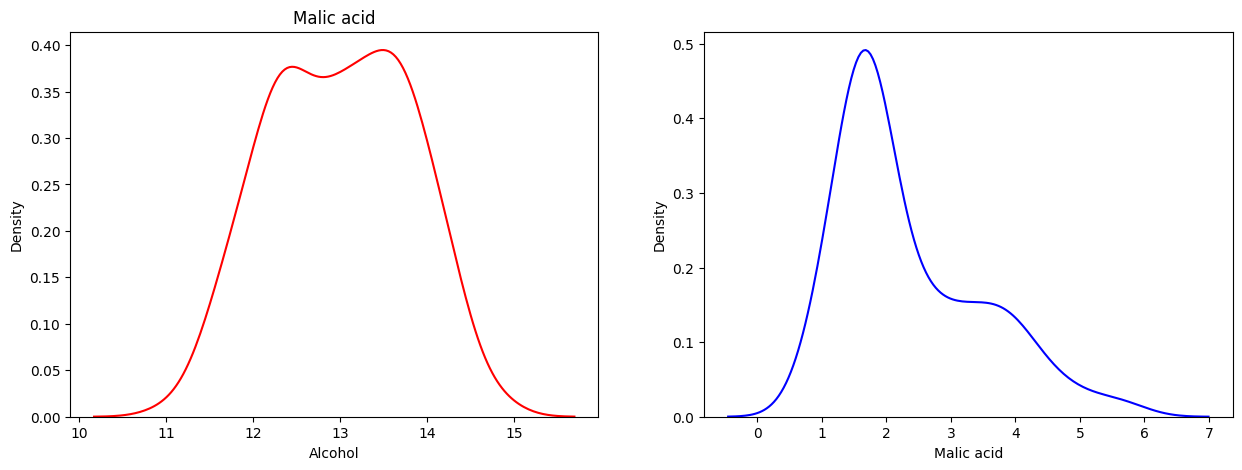

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.distplot(df['Alcohol'], ax=axs[0], color='red', hist=False)
axs[0].set_title('Alcohol')

sns.distplot(df['Malic acid'], ax=axs[1], color='blue', hist=False)
axs[0].set_title('Malic acid')


<Axes: xlabel='Alcohol', ylabel='Malic acid'>

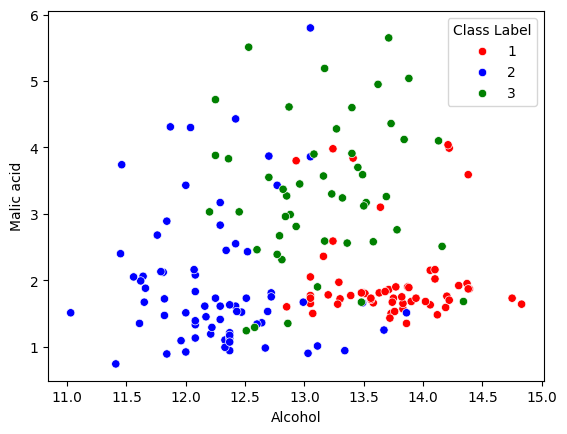

In [6]:
sns.scatterplot(x = df['Alcohol'], y = df['Malic acid'], hue=df['Class Label'], palette={1 : 'red', 2 : 'blue', 3 : 'green'})

In [7]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=3)

In [9]:
X_train.shape 

(123, 2)

In [10]:
X_test.shape

(54, 2)

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
X_train = pd.DataFrame(X_train,  columns=['Alcohol', 'Malic acid'])
X_test = pd.DataFrame(X_test,  columns=['Alcohol', 'Malic acid'])
X_train_scaled = pd.DataFrame(X_train_scaled,  columns=['Alcohol', 'Malic acid'])
X_test_scaled = pd.DataFrame(X_test_scaled,  columns=['Alcohol', 'Malic acid'])

Text(0.5, 1.0, 'After Scaling')

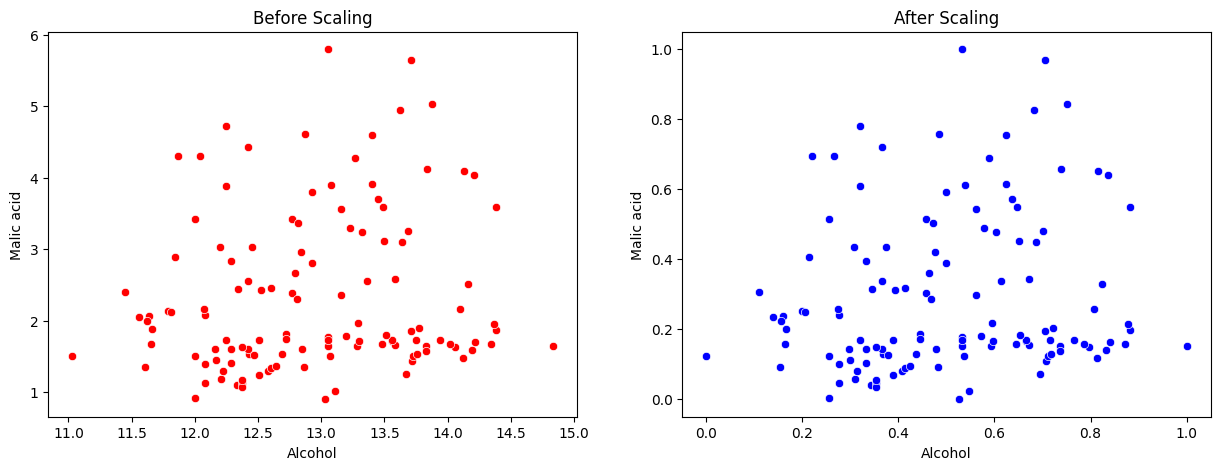

In [13]:
fig, axs = plt.subplots(1, 2, figsize = (15,5))
sns.scatterplot(x = X_train['Alcohol'], y = X_train['Malic acid'], ax = axs[0], color = 'red')
axs[0].set_title('Before Scaling')
sns.scatterplot(x = X_train_scaled['Alcohol'], y = X_train_scaled['Malic acid'], ax = axs[1], color = 'blue')
axs[1].set_title('After Scaling')

<Axes: xlabel='Alcohol', ylabel='Density'>

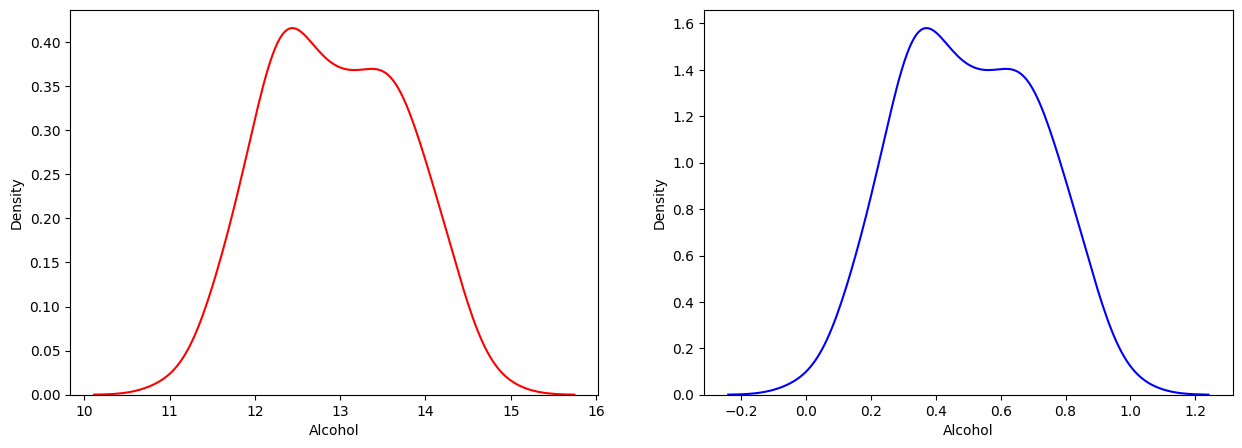

In [14]:
fig, axs = plt.subplots(1, 2, figsize = (15,5))
sns.kdeplot(X_train['Alcohol'], ax=axs[0], color='red')
sns.kdeplot(X_train_scaled['Alcohol'], ax=axs[1], color='blue')